# LIMEtree experiments

In [1]:
import logging
import pickle

import numpy as np
import scripts.image_classifier as imgclf

from scripts.limetree import (
    logger,
    explain_image,
    compute_loss, process_loss, summarise_loss_lime, summarise_loss_limet,
    plot_loss_summary)

22-Sep-04 12:58:06 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
# logging.basicConfig(level=logging.DEBUG)
logger.setLevel(logging.DEBUG)

%matplotlib inline

In [3]:
clf = imgclf.ImageClassifier(use_gpu=False)
img_path = './img/dog_ball.jpg'

/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Test Processing Images

In [4]:
img_path_, top_pred, similarities, lime, limet = explain_image(
    img_path, clf, random_seed=42, n_top_classes=3,
    batch_size=50,                              # Processing
    segmenter_type='slic',                      # Segmenter Type
    n_segments=13,                              # Slic Segmenter
    occlusion_colour='black',                   # Occluder
    generate_complete_sample=True,              # Sampler
    kernel_width=0.25)                          # Similarity

22-Sep-04 12:58:07 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-04 12:58:07 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-04 12:58:07 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-04 12:58:07 scripts.limetree DEBUG    Segmenter in use: slic
/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/lib/python3.8/site-packages/torchvision/transforms/functional.py:150: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:178.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
22-Sep-04 12:58:07 scripts.limetree DEBUG    Top n classes: 3
22-Sep-04 12:58:07 

In [5]:
assert img_path == img_path_, 'Expect the same image'
assert np.array_equal(top_pred, [852, 207, 208]), 'Expect correct predictions'

## Run Sample Processor

In [6]:
sample_images = [img_path]
collector = {}

for img in sample_images:
    img_path_, top_pred, similarities, lime, limet = explain_image(
        img, clf, random_seed=42, n_top_classes=3,
        batch_size=50,                              # Processing
        segmenter_type='slic',                      # Segmenter Type
        n_segments=13,                              # Slic Segmenter
        occlusion_colour='black',                   # Occluder
        generate_complete_sample=True,              # Sampler
        kernel_width=0.25)                          # Similarity
    logger.debug(f'Processed image: {img_path_}')
    collector[img_path_] = (top_pred, similarities, lime, limet)

22-Sep-04 12:58:21 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-04 12:58:21 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-04 12:58:21 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-04 12:58:21 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-04 12:58:21 scripts.limetree DEBUG    Top n classes: 3
22-Sep-04 12:58:21 scripts.limetree DEBUG    Top n classes: 3
22-Sep-04 12:58:21 fatf         INFO     Seeding RNGs using the input parameter.
22-Sep-04 12:58:21 fatf         INFO     Seeding RNGs with 42.
22-Sep-04 12:58:21 scripts.limetree DEBUG    Segments number: 4
22-Sep-04 12:58:21 scripts.limetree DEBUG    Segments number: 4
22-Sep-04 12:58:21 scripts.limetree DEBUG    Sampled data shape: (16, 4)
22-Sep-04 12:58:21 scripts.limetree DEBUG    Sampled data shape: (16, 4)
22-Sep-04 12:58:23 fatf         INFO     Seeding RNGs using the input parameter.
22-Sep-04 12:58:23 fatf         INFO     Seeding RNGs with 42.
22-Sep-04 12:58:36 scripts.limetree 

In [7]:
with open('limet_sample.pickle', 'wb') as w_file:
    pickle.dump(collector, w_file,
                protocol=pickle.HIGHEST_PROTOCOL)


## Analyse Data

In [8]:
with open('limet_sample.pickle', 'rb') as r_file:
    collector = pickle.load(r_file)

In [9]:
print(f'Number of processed images: {len(collector.keys())}')

Number of processed images: 1


In [10]:
top_classes, lime_scores, limet_scores = process_loss(collector)

22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-Sep-04 12:58:36 scripts.limetree DEBUG    Reshaping for LIMEtree loss (got 1D).
22-S

In [11]:
lime_scores_summary = summarise_loss_lime(lime_scores, top_classes)

In [12]:
limet_scores_summary = summarise_loss_limet(limet_scores, top_classes)

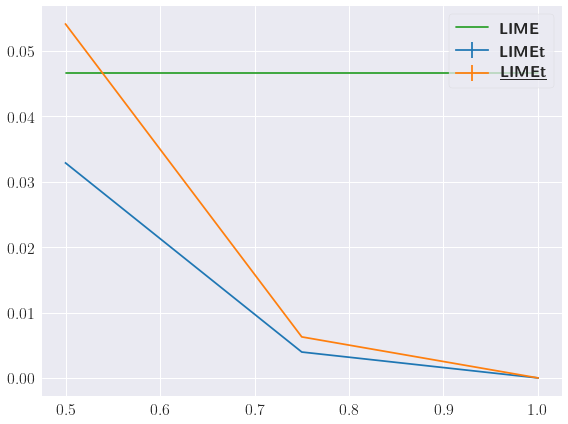

In [13]:
plot_loss_summary(lime_scores_summary, limet_scores_summary,
                  2, use_limet_loss=not False,
                  use_weighted=True, use_random=False)